# Implicit conjunction:  different predicates applied on a subject (reference problem)

Generating sentences of the form

- 1) **c, who is a PROFESSION, saw X, c didn't saw X** -- contradiction 
- 1) **c, who is a PROFESSION, visit d, c didn't  visit d ** -- contradiction
- 1) **c, who is a PROFESSION, bought Y, c didn't  buy Y ** -- contradiction 


- 2) **c, who is a PROFESSION, saw X, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, visit d, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, bought Y, c isn't a PROFESSION ** -- contradiction


- 3) **c, who is a PROFESSION1, saw X, c, who is a PROFESSION2, didn't saw X**  -- non-contradiction
- 3) **c, who is a PROFESSION1, visit d, c, who is a PROFESSION2, didn't visit d**  -- non-contradiction
- 3) **c, who is a PROFESSION1, bought Y, c, who is a PROFESSION2, didn't bought Y**  -- non-contradiction


- 4) **c, who is a PROFESSION, saw X, c, e's father (mother), didn't saw X** -- non-contradiction
- 4) **c, who is a PROFESSION, visit d, c, e's father (mother), didn't visit d** -- non-contradiction
- 4) **c, who is a PROFESSION, bought Y, c, e's father (mother), didn't bought Y** -- non-contradiction


X = [a girl running, a blue plane, the new Tesla sport car, the new Marvel movie, a dog chasing a cat, etc.]

Y = [the new Tesla Roadster, etc.]


In [1]:
import numpy as np
import pandas as pd
from word_lists import male_names, female_names, name_list, professions 
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

In [2]:
what_I_see = ["a girl running",
              "a blue plane",
              "the new Tesla Roadster",
              "the new Marvel movie from the Russo Brothers", 
              "a dog chasing a cat",
              "the accident",
              "the car crash",
              "a strange add",
              "the city mayor"]

what_I_buy = ["the new Tesla Roadster",
              "the new Marvel movie from the Russo Brothers",
              "a Chilean wine",
              "a Macbook",
              "a cup of coffee",
              "a pizza",
              "a japanese novel"]

In [3]:
def get_new_item(item_list, src_list):
    new_item = item_list[0]
    size = len(src_list)
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [4]:
len_name = len(name_list)
new_i = np.random.choice(len_name)
name = name_list[new_i]  
for i in range(len_name):
    new_name = get_new_item([name], name_list)
    assert name != new_name

In [5]:
upper_bound = 11000/4
len_male_name = len(male_names)
len_female_name = len(female_names)
len_see = len(what_I_see)
len_buy = len(what_I_buy)
len_professions = len(professions)

### Generating all types of sentences

- 1) **c, who is a PROFESSION, saw X, c didn't saw X** -- contradiction 
- 1) **c, who is a PROFESSION, visit d, c didn't  visit d ** -- contradiction
- 1) **c, who is a PROFESSION, bought Y, c didn't  buy Y ** -- contradiction 

In [6]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    new_i = np.random.choice(len_name)
    person1 = name_list[new_i]
    person2 = get_new_item([person1], name_list)
    new_i = np.random.choice(len_buy)
    buy = what_I_buy[new_i]
    new_i = np.random.choice(len_see)
    see = what_I_see[new_i]
    new_i = np.random.choice(len_professions)
    profession = professions[new_i]
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{} didn't saw {}".format(person1, profession, see, person1, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{} didn't visit {}".format(person1, profession, person2, person1, person2)
    else:
        sentence = "{}, who is a {}, bought {};{} didn't buy {}".format(person1, profession, buy, person1, buy)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(";") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

['Denise, who is a lawyer, saw the car crash', "Denise didn't saw the car crash", 1]
['Luz, who is a flight attendant, visit Deborah', "Luz didn't visit Deborah", 1]
['Antonio, who is a builder, bought the new Marvel movie from the Russo Brothers', "Antonio didn't buy the new Marvel movie from the Russo Brothers", 1]
['Rodney, who is a tailor, saw a dog chasing a cat', "Rodney didn't saw a dog chasing a cat", 1]
['Dianne, who is a receptionist, visit Marilyn', "Dianne didn't visit Marilyn", 1]
['Judy, who is a receptionist, bought a pizza', "Judy didn't buy a pizza", 1]
['Ian, who is a pilot, saw the city mayor', "Ian didn't saw the city mayor", 1]
['David, who is a tailor, visit Morris', "David didn't visit Morris", 1]
['Brandon, who is a receptionist, bought a cup of coffee', "Brandon didn't buy a cup of coffee", 1]
['Lydia, who is a builder, saw the new Marvel movie from the Russo Brothers', "Lydia didn't saw the new Marvel movie from the Russo Brothers", 1]


- 2) **c, who is a PROFESSION, saw X, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, visit d, c isn't a PROFESSION ** -- contradiction
- 2) **c, who is a PROFESSION, bought Y, c isn't a PROFESSION ** -- contradiction

In [7]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    new_i = np.random.choice(len_name)
    person1 = name_list[new_i]
    person2 = get_new_item([person1], name_list)
    new_i = np.random.choice(len_buy)
    buy = what_I_buy[new_i]
    new_i = np.random.choice(len_see)
    see = what_I_see[new_i]
    new_i = np.random.choice(len_professions)
    profession = professions[new_i]
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{} isn't a {}".format(person1, profession, see, person1, profession)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{} isn't a {}".format(person1, profession, person2, person1, profession)
    else:
        sentence = "{}, who is a {}, bought {};{} isn't a {}".format(person1, profession, buy, person1, profession)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(";") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Larry, who is a plumber, saw a blue plane', "Larry isn't a plumber", 1]
['Chester, who is a painter, visit Tracy', "Chester isn't a painter", 1]
['Darren, who is a pilot, bought the new Marvel movie from the Russo Brothers', "Darren isn't a pilot", 1]
['Frank, who is a fireman, saw a strange add', "Frank isn't a fireman", 1]
['Melvin, who is a doctor, visit Esther', "Melvin isn't a doctor", 1]
['Jorge, who is a pilot, bought the new Tesla Roadster', "Jorge isn't a pilot", 1]
['Rodney, who is a nurse, saw the accident', "Rodney isn't a nurse", 1]
['Vivian, who is a secretary, visit Florence', "Vivian isn't a secretary", 1]
['Roberto, who is a dentist, bought a Macbook', "Roberto isn't a dentist", 1]
['Barbara, who is a musician, saw a strange add', "Barbara isn't a musician", 1]


- 3) **c, who is a PROFESSION1, saw X, c, who is a PROFESSION2, didn't saw X**  -- non-contradiction
- 3) **c, who is a PROFESSION1, visit d, c, who is a PROFESSION2, didn't visit d**  -- non-contradiction
- 3) **c, who is a PROFESSION1, bought Y, c, who is a PROFESSION2, didn't bought Y**  -- non-contradiction

In [8]:
all_sentences_3 = []
for i in range(int(upper_bound)):
    new_i = np.random.choice(len_name)
    person1 = name_list[new_i]
    person2 = get_new_item([person1], name_list)
    new_i = np.random.choice(len_buy)
    buy = what_I_buy[new_i]
    new_i = np.random.choice(len_see)
    see = what_I_see[new_i]
    new_i = np.random.choice(len_professions)
    profession1 = professions[new_i]
    profession2 = get_new_item([profession1], professions)
    assert profession1 != profession2 
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{}, who is a {}, didn't saw {}".format(person1, profession1, see, person1, profession2, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{}, who is a {}, didn't visit {}".format(person1, profession1, person2, person1, profession2, person2)
    else:
        sentence = "{}, who is a {}, bought {};{}, who is a {}, didn't buy {}".format(person1, profession1, buy, person1, profession2, buy)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(";") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

['Lillian, who is a vet, saw the car crash', "Lillian, who is a electrician, didn't saw the car crash", 0]
['Katrina, who is a dentist, visit Donna', "Katrina, who is a electrician, didn't visit Donna", 0]
['Gwendolyn, who is a judge, bought the new Marvel movie from the Russo Brothers', "Gwendolyn, who is a nurse, didn't buy the new Marvel movie from the Russo Brothers", 0]
['Jackie, who is a barber, saw the accident', "Jackie, who is a doctor, didn't saw the accident", 0]
['Barry, who is a butcher, visit Sonia', "Barry, who is a receptionist, didn't visit Sonia", 0]
['Eva, who is a painter, bought the new Marvel movie from the Russo Brothers', "Eva, who is a cashier, didn't buy the new Marvel movie from the Russo Brothers", 0]
['Norma, who is a baker, saw the car crash', "Norma, who is a dentist, didn't saw the car crash", 0]
['Jo, who is a cop, visit Jeffrey', "Jo, who is a cashier, didn't visit Jeffrey", 0]
['Diana, who is a bartender, bought a japanese novel', "Diana, who is a tec

- 4) **c, who is a PROFESSION, saw X, c, e's father (mother), didn't saw X** -- non-contradiction
- 4) **c, who is a PROFESSION, visit d, c, e's father (mother), didn't visit d** -- non-contradiction
- 4) **c, who is a PROFESSION, bought Y, c, e's father (mother), didn't bought Y** -- non-contradiction

In [9]:
all_sentences_4 = []
for i in range(int(upper_bound)):
    if i % 2 == 0:
        new_i = np.random.choice(len_female_name)
        person1 = female_names[new_i]
        parent = "mother"
    else:
        new_i = np.random.choice(len_male_name)
        person1 = male_names[new_i]
        parent = "father"
    person2 = get_new_item([person1], name_list)
    person3 = get_new_item([person1, person2], name_list)
    new_i = np.random.choice(len_buy)
    buy = what_I_buy[new_i]
    new_i = np.random.choice(len_see)
    see = what_I_see[new_i]
    new_i = np.random.choice(len_professions)
    profession1 = professions[new_i]
    profession2 = get_new_item([profession1], professions)
    if i % 3 == 0:
        sentence = "{}, who is a {}, saw {};{}, {}'s {}, didn't saw {}".format(person1, profession1, see, person1, person3, parent, see)
    elif i % 3 ==1:
        sentence = "{}, who is a {}, visit {};{}, {}'s {}, didn't visit {}".format(person1, profession1, person2, person1,person3, parent,person2)
    else:
        sentence = "{}, who is a {}, bought {};{}, {}'s {}, didn't buy {}".format(person1, profession1, buy, person1, person3, parent, buy)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(";") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

['Tanya, who is a fireman, saw the car crash', "Tanya, Raymond's mother, didn't saw the car crash", 0]
['Keith, who is a engineer, visit Margaret', "Keith, Linda's father, didn't visit Margaret", 0]
['Marie, who is a plumber, bought a pizza', "Marie, Daisy's mother, didn't buy a pizza", 0]
['Steven, who is a scientist, saw a blue plane', "Steven, Glenn's father, didn't saw a blue plane", 0]
['Marsha, who is a accountant, visit Heidi', "Marsha, Susie's mother, didn't visit Heidi", 0]
['Justin, who is a cop, bought a pizza', "Justin, Jennie's father, didn't buy a pizza", 0]
['Faye, who is a nurse, saw a girl running', "Faye, Pearl's mother, didn't saw a girl running", 0]
['Melvin, who is a cashier, visit Pearl', "Melvin, Lance's father, didn't visit Pearl", 0]
['Sarah, who is a receptionist, bought a Macbook', "Sarah, Jessie's mother, didn't buy a Macbook", 0]
['Martin, who is a pilot, saw the new Marvel movie from the Russo Brothers', "Martin, Byron's father, didn't saw the new Marvel m

In [10]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)



size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [11]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,"Peter, who is a builder, saw the new Marvel mo...",Peter didn't saw the new Marvel movie from the...,1
10996,"Raymond, who is a vet, visit Clyde",Raymond isn't a vet,1
10997,"Antoinette, who is a nurse, visit Karl","Antoinette, Dawn's mother, didn't visit Karl",0
10998,"Victoria, who is a fireman, visit Maureen","Victoria, who is a barber, didn't visit Maureen",0
10999,"Justin, who is a journalist, bought a cup of c...",Justin didn't buy a cup of coffee,1


#### Looking at the label distribution

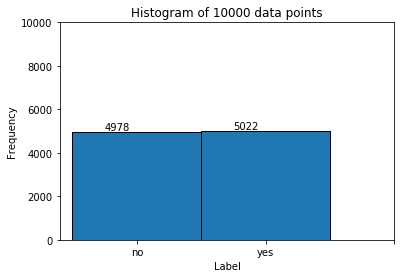

In [12]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b2_b_i_train.png")

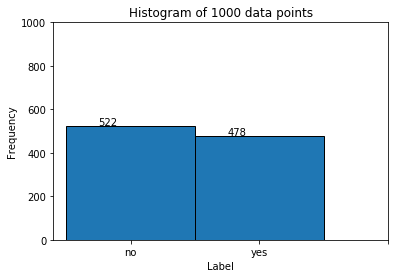

In [13]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b2_b_i_test.png")

### Saving to CSV

In [14]:
df_train.to_csv("b2_b_i_train.csv", index=False)
df_test.to_csv("b2_b_i_test.csv", index=False)